In [2]:
#Reference: https://github.com/zhlli1/Genism-word2vec/blob/master/Genism%20Word2Vec%20Tutorial.ipynb
#Article: https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df['Maker_Model']= df['Make']+ " " + df['Model']
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [5]:
#size: The number of dimensions of the embeddings and the default is 100.
#window: The maximum distance between a target word and words around the target word. The default window is 5.
#min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
#workers: The number of partitions during training and the default workers is 3.
#sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

WARNING - 23:56:21: consider setting layer size to a multiple of 4 for greater performance
INFO - 23:56:21: collecting all words and their counts
INFO - 23:56:21: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 23:56:21: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 23:56:21: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 23:56:21: Loading a fresh vocabulary
INFO - 23:56:21: effective_min_count=1 retains 977 unique words (100% of original 977, drops 0)
INFO - 23:56:21: effective_min_count=1 leaves 88129 word corpus (100% of original 88129, drops 0)
INFO - 23:56:21: deleting the raw counts dictionary of 977 items
INFO - 23:56:21: sample=0.001 downsamples 35 most-common words
INFO - 23:56:21: downsampling leaves estimated 29996 word corpus (34.0% of prior 88129)
INFO - 23:56:21: estimated required memory for 977 words and 50 dimensions: 879300 bytes
INFO - 23:56:21: resetting layer weights

In [6]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

0.91638297

In [7]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

INFO - 23:56:22: precomputing L2-norms of word weight vectors


[('Ford Shelby GT500', 0.9964511394500732),
 ('Maserati Spyder', 0.9962688684463501),
 ('Maserati Coupe', 0.9959940314292908),
 ('Audi RS 5', 0.9958797693252563),
 ('Mercedes-Benz CL-Class', 0.9946733713150024)]

In [8]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

# only get the unique Maker_Model
Maker_Model = list(df.Maker_Model.unique()) 
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Ford Shelby GT500', 0.99645114),
 ('Maserati Spyder', 0.9962689),
 ('Maserati Coupe', 0.995994),
 ('Audi RS 5', 0.9958797),
 ('Mercedes-Benz CL-Class', 0.99467325)]

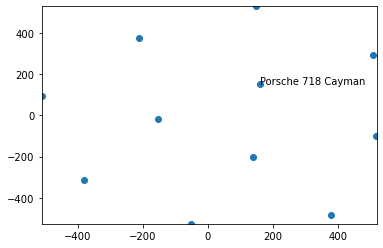

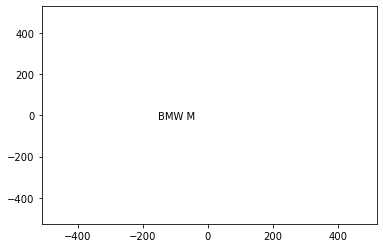

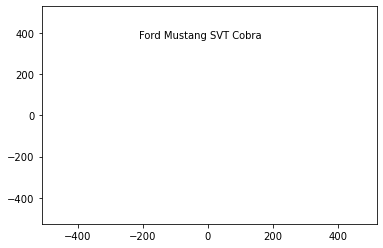

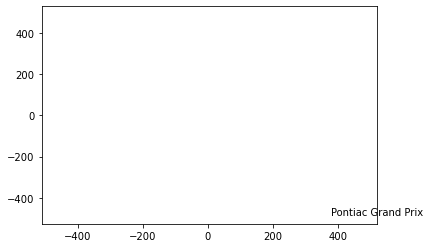

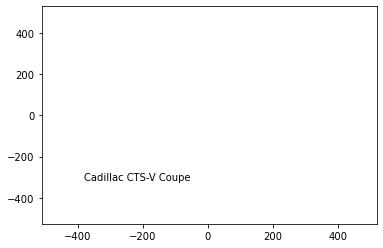

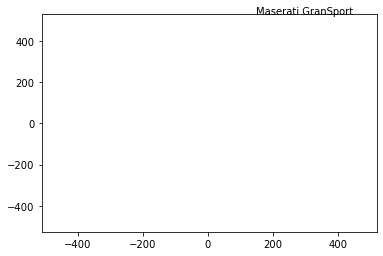

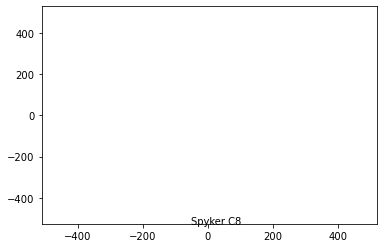

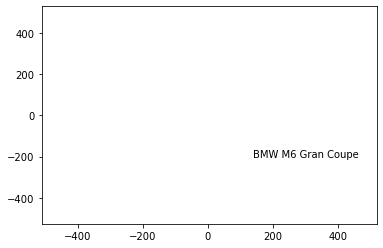

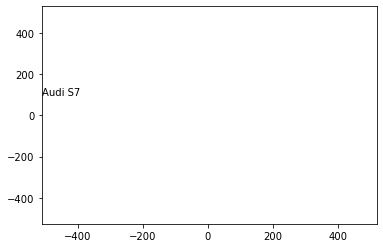

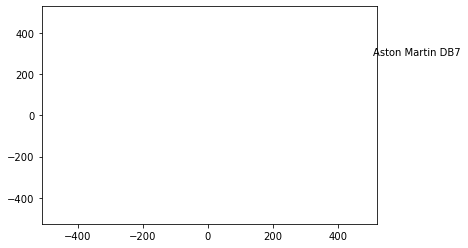

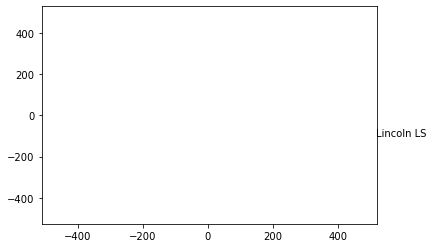

In [10]:

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()


display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 